In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

print("NetworkX version:", nx.__version__)
print("NumPy version:", np.__version__)
print("Import successful!")


NetworkX version: 3.4.2
NumPy version: 2.2.3
Import successful!


In [20]:
def create_and_display_graph(edges, title):
    G = nx.Graph()
    
    for source, target, weight in edges:
        G.add_edge(source, target, weight=weight)
    
    pos = nx.spring_layout(G, seed=42)
    
    plt.figure(figsize=(12, 8))
    
    nx.draw(G, pos, with_labels=True, node_color='lightblue', 
            node_size=500, font_size=10, font_weight='bold')
    
    edge_labels = {(u, v): d["weight"] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    plt.title(title)
    plt.axis('off')
    plt.show()
    
    return G

def run_dfs(G, source):
    print(f"Hasil DFS dari node asal '{source}':\n")
    
    dfs_edges = list(nx.dfs_edges(G, source=source))
    dfs_path = [source] + [v for _, v in dfs_edges]
    
    print("Urutan node yang dikunjungi:")
    print(" -> ".join(dfs_path))
    print("\nEdge yang dilewati:")
    for edge in dfs_edges:
        print(f"  {edge}")
    
    print("\nMemeriksa apakah bobot dipertimbangkan dalam DFS:\n")
    
    visited = set([source])
    for node in dfs_path:
        neighbors = [(neighbor, G[node][neighbor]['weight']) for neighbor in G.neighbors(node) if neighbor not in visited]
        
        if neighbors:
            print(f"Node {node} memiliki tetangga yang belum dikunjungi:")
            for neighbor, weight in neighbors:
                print(f"  - {neighbor} (bobot: {weight})")
            
            neighbors_sorted = sorted(neighbors, key=lambda x: x[1])
            print(f"  Urutan tetangga berdasarkan bobot:")
            for neighbor, weight in neighbors_sorted:
                print(f"    - {neighbor} (bobot: {weight})")
            
            next_visited = next((v for _, v in dfs_edges if _ == node and v not in visited), None)
            if next_visited:
                print(f"  Tetangga yang dikunjungi berikutnya oleh DFS: {next_visited}")
                is_smallest_weight = next_visited == neighbors_sorted[0][0] if neighbors_sorted else False
                print(f"  Apakah mengikuti bobot terkecil? {'Ya' if is_smallest_weight else 'Tidak'}\n")
        
        visited.add(node)
    
    print("\nKesimpulan:")
    print("1. DFS pada NetworkX TIDAK menggunakan informasi bobot (weight).")
    print("2. DFS hanya mempertimbangkan struktur graf, bukan bobot edge.")
    print("3. DFS menggunakan urutan leksikografis node ketika memutuskan tetangga mana yang dikunjungi berikutnya.")

print("Base function created.")

Base function created.


In [21]:
europe_edges = [
    ("Arad", "Zerind", 75),
    ("Arad", "Sibiu", 140),
    ("Arad", "Timisoara", 118),
    ("Zerind", "Oradea", 71),
    ("Oradea", "Sibiu", 151),
    ("Timisoara", "Lugoj", 111),
    ("Lugoj", "Mehadia", 70),
    ("Mehadia", "Drobeta", 75),
    ("Drobeta", "Craiova", 120),
    ("Craiova", "Rimnicu Vilcea", 146),
    ("Craiova", "Pitesti", 138),
    ("Rimnicu Vilcea", "Sibiu", 80),
    ("Rimnicu Vilcea", "Pitesti", 97),
    ("Sibiu", "Fagaras", 99),
    ("Fagaras", "Bucharest", 211),
    ("Pitesti", "Bucharest", 101),
    ("Bucharest", "Giurgiu", 90),
    ("Bucharest", "Urziceni", 85),
    ("Urziceni", "Hirsova", 98),
    ("Hirsova", "Eforie", 86),
    ("Urziceni", "Vaslui", 142),
    ("Vaslui", "Iasi", 92),
    ("Iasi", "Neamt", 87)
]

jawa_edges = [
    ("Bandung", "Jakarta", 270),
    ("Bandung", "Cirebon", 120),
    ("Bandung", "Yogyakarta", 373),
    ("Jakarta", "Cirebon", 327),
    ("Cirebon", "Semarang", 305),
    ("Cirebon", "Yogyakarta", 210),
    ("Semarang", "Surakarta", 60),
    ("Semarang", "Surabaya", 369),
    ("Yogyakarta", "Surakarta", 109),
    ("Surakarta", "Malang", 370),
    ("Surakarta", "Surabaya", 97),
    ("Surabaya", "Malang", 94)
]

print("Graph Created.")

Graph Created.


=== GRAF KOTA-KOTA BESAR DI EROPA ===


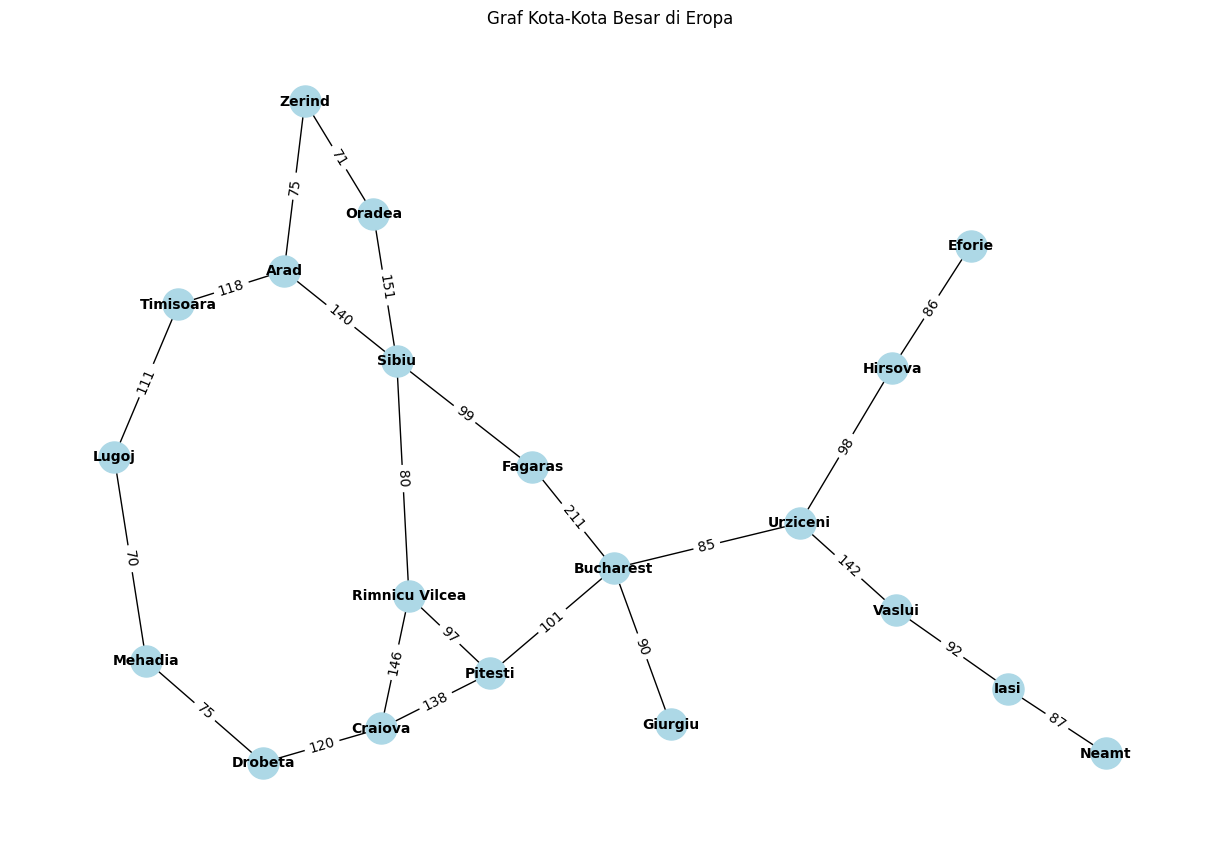


=== DFS UNTUK GRAF EROPA (SOURCE: ARAD) ===
Hasil DFS dari node asal 'Arad':

Urutan node yang dikunjungi:
Arad -> Zerind -> Oradea -> Sibiu -> Rimnicu Vilcea -> Craiova -> Drobeta -> Mehadia -> Lugoj -> Timisoara -> Pitesti -> Bucharest -> Fagaras -> Giurgiu -> Urziceni -> Hirsova -> Eforie -> Vaslui -> Iasi -> Neamt

Edge yang dilewati:
  ('Arad', 'Zerind')
  ('Zerind', 'Oradea')
  ('Oradea', 'Sibiu')
  ('Sibiu', 'Rimnicu Vilcea')
  ('Rimnicu Vilcea', 'Craiova')
  ('Craiova', 'Drobeta')
  ('Drobeta', 'Mehadia')
  ('Mehadia', 'Lugoj')
  ('Lugoj', 'Timisoara')
  ('Craiova', 'Pitesti')
  ('Pitesti', 'Bucharest')
  ('Bucharest', 'Fagaras')
  ('Bucharest', 'Giurgiu')
  ('Bucharest', 'Urziceni')
  ('Urziceni', 'Hirsova')
  ('Hirsova', 'Eforie')
  ('Urziceni', 'Vaslui')
  ('Vaslui', 'Iasi')
  ('Iasi', 'Neamt')

Memeriksa apakah bobot dipertimbangkan dalam DFS:

Node Arad memiliki tetangga yang belum dikunjungi:
  - Zerind (bobot: 75)
  - Sibiu (bobot: 140)
  - Timisoara (bobot: 118)
  Urut

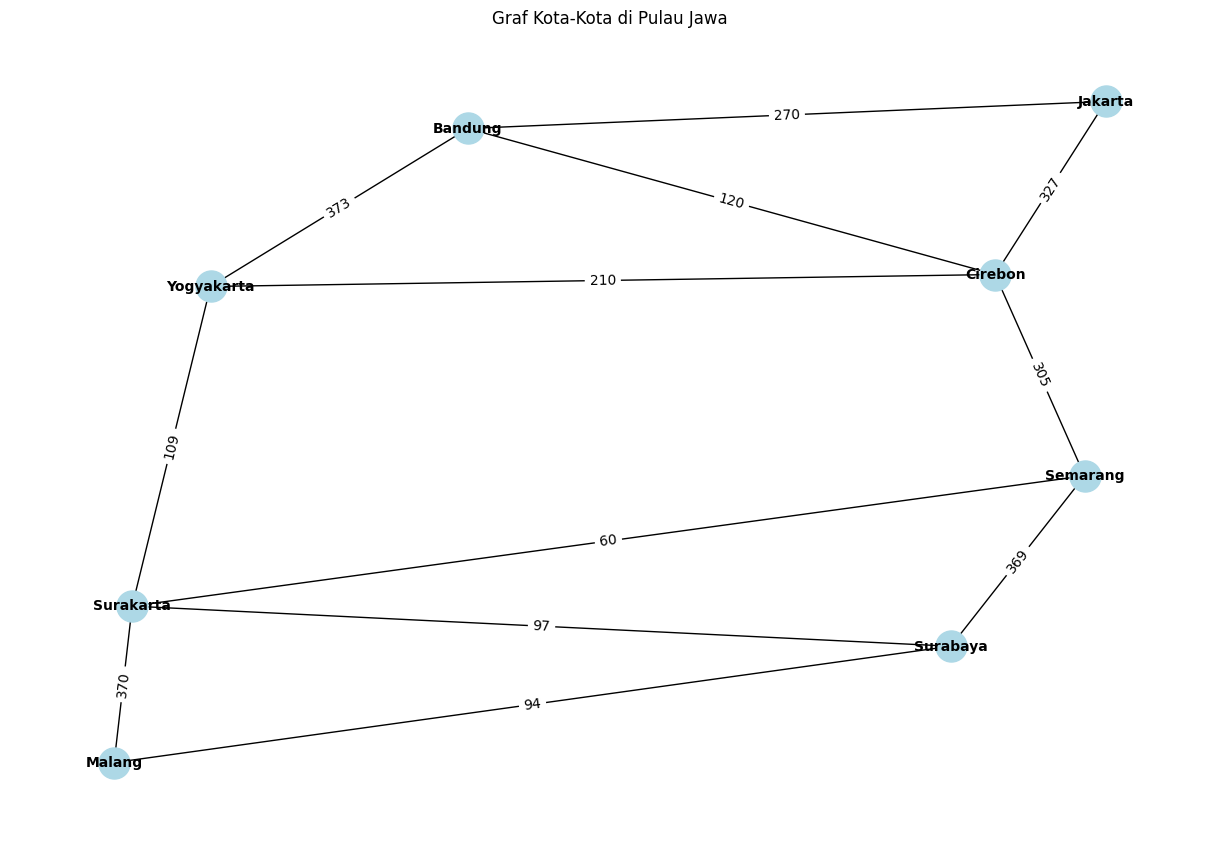


=== DFS UNTUK GRAF JAWA (SOURCE: BANDUNG) ===
Hasil DFS dari node asal 'Bandung':

Urutan node yang dikunjungi:
Bandung -> Jakarta -> Cirebon -> Semarang -> Surakarta -> Yogyakarta -> Malang -> Surabaya

Edge yang dilewati:
  ('Bandung', 'Jakarta')
  ('Jakarta', 'Cirebon')
  ('Cirebon', 'Semarang')
  ('Semarang', 'Surakarta')
  ('Surakarta', 'Yogyakarta')
  ('Surakarta', 'Malang')
  ('Malang', 'Surabaya')

Memeriksa apakah bobot dipertimbangkan dalam DFS:

Node Bandung memiliki tetangga yang belum dikunjungi:
  - Jakarta (bobot: 270)
  - Cirebon (bobot: 120)
  - Yogyakarta (bobot: 373)
  Urutan tetangga berdasarkan bobot:
    - Cirebon (bobot: 120)
    - Jakarta (bobot: 270)
    - Yogyakarta (bobot: 373)
  Tetangga yang dikunjungi berikutnya oleh DFS: Jakarta
  Apakah mengikuti bobot terkecil? Tidak

Node Jakarta memiliki tetangga yang belum dikunjungi:
  - Cirebon (bobot: 327)
  Urutan tetangga berdasarkan bobot:
    - Cirebon (bobot: 327)
  Tetangga yang dikunjungi berikutnya oleh D

In [22]:
# Soal a (Kota-kota besar di Eropa)
print("=== GRAF KOTA-KOTA BESAR DI EROPA ===")
europe_graph = create_and_display_graph(europe_edges, "Graf Kota-Kota Besar di Eropa")
print("\n=== DFS UNTUK GRAF EROPA (SOURCE: ARAD) ===")
run_dfs(europe_graph, "Arad")

# Soal b (Kota-kota di Pulau Jawa)
print("\n\n=== GRAF KOTA-KOTA DI PULAU JAWA ===")
jawa_graph = create_and_display_graph(jawa_edges, "Graf Kota-Kota di Pulau Jawa")
print("\n=== DFS UNTUK GRAF JAWA (SOURCE: BANDUNG) ===")
run_dfs(jawa_graph, "Bandung")

In [23]:
print("\n=== ANALISIS DAN KESIMPULAN AKHIR ===")
print("1. Depth First Search (DFS) pada NetworkX tidak mempertimbangkan bobot (weight) saat melakukan penelusuran.")
print("2. DFS hanya mempertimbangkan struktur graf, yaitu node mana yang terhubung dengan node lainnya.")
print("3. Urutan kunjungan pada DFS ditentukan oleh urutan node yang ditambahkan ke dalam graf dan urutan leksikografis (alfabetis).")
print("4. Untuk mendapatkan hasil penelusuran yang mempertimbangkan bobot, algoritma lain seperti A* lebih cocok digunakan.")
print("5. Pemeriksaan manual menunjukkan bahwa DFS tidak selalu memilih edge dengan bobot terkecil.")


=== ANALISIS DAN KESIMPULAN AKHIR ===
1. Depth First Search (DFS) pada NetworkX tidak mempertimbangkan bobot (weight) saat melakukan penelusuran.
2. DFS hanya mempertimbangkan struktur graf, yaitu node mana yang terhubung dengan node lainnya.
3. Urutan kunjungan pada DFS ditentukan oleh urutan node yang ditambahkan ke dalam graf dan urutan leksikografis (alfabetis).
4. Untuk mendapatkan hasil penelusuran yang mempertimbangkan bobot, algoritma lain seperti A* lebih cocok digunakan.
5. Pemeriksaan manual menunjukkan bahwa DFS tidak selalu memilih edge dengan bobot terkecil.
